In [1]:
dataFolder = "data/CWRbearings"

In [2]:
from dataset import Dataset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
dataset = Dataset(dataFolder, batch_size=30)

In [4]:
trainX = dataset.train_data
trainY = dataset.train_labels


tx = dataset.test_data
ty = dataset.test_labels

#Flatten data for test images as a vector and labels as numbers
flattenDataset =np.nan_to_num( np.array([image.flatten() for image in trainX]))
flatTest =np.nan_to_num( np.array([image.flatten() for image in tx]))
fTrainLabels = np.where(trainY == 1)[1]
fTestLabels = np.where(ty == 1)[1]

Distribution class for train  Counter({2: 1605, 1: 477, 3: 460, 0: 458})


C:\Users\andres\Anaconda2\lib\site-packages\sklearn\utils\extmath.py:368: UserWarning: The number of power iterations is increased to 7 to achieve higher precision.
  warnings.warn("The number of power iterations is increased to "


Pca with 2 components explained variance [ 0.17357511  0.0503535 ]
PCA 2 comp of the data (using train)


Distribution class for test    Counter({2: 1006, 0: 291, 3: 271, 1: 269})
Pca with 5 components explained variance [ 0.17357511  0.0503535 ]
PCA 2 comp of the data (using test)


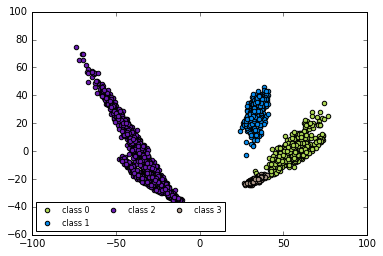

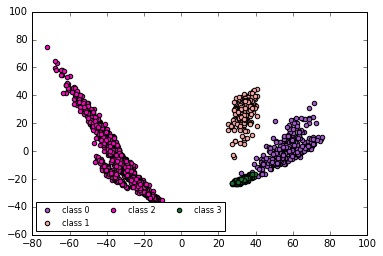

In [5]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)




#Show a few statistics of the data
print "Distribution class for train ",Counter(fTrainLabels)
pca.fit(flattenDataset)
print  "Pca with 2 components explained variance "+str(pca.explained_variance_ratio_) 
print "PCA 2 comp of the data (using train)"

#SHOW PCA FOR TRAIN VAL DATA
transformed = pca.transform(flattenDataset)
labels = fTrainLabels

plt.figure()
allscatter=[]
for c in range(dataset.getNclasses()):
    elements = np.where(labels == c)
    temp=plt.scatter(transformed[elements, 0], transformed[elements, 1],
           facecolors='none', label='Class '+str(c), c=np.random.rand(3,1))
    allscatter.append(temp)
plt.legend(tuple(allscatter),
       tuple(["class "+str(c) for c in range(dataset.getNclasses())]),
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)

    
#SHOW PCA FOR TEST DATA

print "Distribution class for test   ",Counter(fTestLabels)
print  "Pca with 5 components explained variance "+str(pca.explained_variance_ratio_) 
print "PCA 2 comp of the data (using test)"

transformed = pca.transform(flatTest)
labels = fTestLabels

plt.figure()
allscatter=[]
for c in range(dataset.getNclasses()):
    elements = np.where(labels == c)
    temp=plt.scatter(transformed[elements, 0], transformed[elements, 1],
           facecolors='none', label='Class '+str(c), c=np.random.rand(3,1))
    allscatter.append(temp)
plt.legend(tuple(allscatter),
       tuple(["class "+str(c) for c in range(dataset.getNclasses())]),
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)

[0 0 1 0]


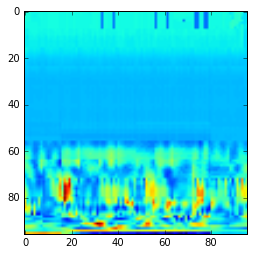

In [6]:
index = 2
plt.imshow(tx[index])
print ty[index]

In [7]:
#The mean image is the mean of all original images in the dataset
#As part of the preprocessing all images are normalized (substract mean and div for standar deviation) 
#For an image this means to substract pixelwise with the mean image and div pixelwise with the std image

#This meanNorm is not the mean image (the mean image is database.mean) this meanNorm is the mean of the images
#already normalized so it has units of std (standar deviaton).

meanNorm = np.mean(trainX,axis=0)
for row in meanNorm:
    print row

[ -2.00854914e-11  -2.85411013e-11  -4.62356037e-11  -4.81790044e-11
  -4.16443150e-11  -6.29633857e-11  -5.56199785e-11  -4.30410293e-11
  -5.56191506e-11  -9.60743518e-11  -1.66769975e-10  -8.34696606e-11
  -8.34696606e-11  -1.18065365e-10  -9.62734145e-11  -7.44170358e-11
  -5.88907196e-11  -8.32850003e-11  -9.62732841e-11  -8.32854370e-11
  -8.32854370e-11  -9.62732839e-11  -8.32850027e-11  -5.88904141e-11
  -8.34704548e-11  -1.17781176e-10  -1.66424148e-10  -9.63681450e-11
  -9.63681450e-11  -1.17781176e-10  -1.66769639e-10  -9.60662166e-11
  -9.60751788e-11  -1.00000000e+00  -1.66769280e-10  -9.62735114e-11
  -9.60743261e-11  -1.66424783e-10  -1.00000000e+00  -9.62732882e-11
  -6.81500435e-11  -1.17781545e-10  -1.17781545e-10  -8.31256217e-11
  -8.31256217e-11  -1.17781545e-10  -1.17781545e-10  -6.81495509e-11
  -6.30239272e-11  -1.17781445e-10  -1.66769184e-10  -7.44170818e-11
  -7.44170818e-11  -1.66769228e-10  -1.17781445e-10  -6.30239762e-11
  -1.00000000e+00  -1.66769942e-10

[ -1.24567393e-14  -1.39639411e-14  -3.83174973e-15   1.98870550e-15
   1.01180545e-14   7.61490870e-15   1.41343974e-14   1.19742734e-14
   1.34627864e-14   9.18916795e-15   1.20143895e-14   1.25274606e-14
   1.34735186e-14   1.26545441e-14   1.03470195e-14   8.07309775e-15
   1.68867142e-14   1.27486170e-14   1.13254591e-14   8.89051795e-15
   1.51514727e-14   7.94945591e-15   1.14303382e-14   1.50980709e-14
   1.50690941e-14   1.32440725e-14   8.31945624e-15   1.00868943e-14
   1.05945623e-14   1.78896157e-14   1.79443127e-14   1.20394805e-14
   1.46681556e-14   1.46043178e-14   1.67980074e-14   1.59937249e-14
   1.51261226e-14   1.22323633e-14   1.16502363e-14   1.36537818e-14
   1.56925214e-14   1.42960828e-14   8.87327249e-15   1.20646086e-14
   1.24769454e-14   7.74506385e-15   1.30485252e-14   1.32321191e-14
   1.22908350e-14   1.53802526e-14   1.52299654e-14   1.15516485e-14
   1.97252215e-14   1.53800676e-14   1.39548003e-14   1.06255375e-14
   1.05652894e-14   1.79569322e-14

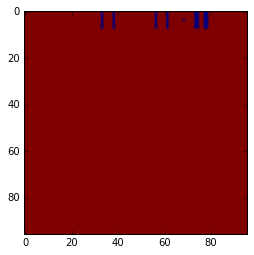

In [8]:
plt.imshow(meanNorm)

In [9]:
#As a test i try to clasify the data using a SVM (support vector machine) of the sklearn package 

# from sklearn.svm import SVC
# from sklearn.metrics import classification_report
# clf = SVC()


# clf.fit(flattenDataset, fTrainLabels) 
# pred = clf.predict(flatTest)
# print classification_report(fTestLabels, pred)